# MNIST Data - Sequential API
- This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
- https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools 
import numpy as np

## Data

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.astype(np.float32) / 255.0, X_test.astype(np.float32)/ 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


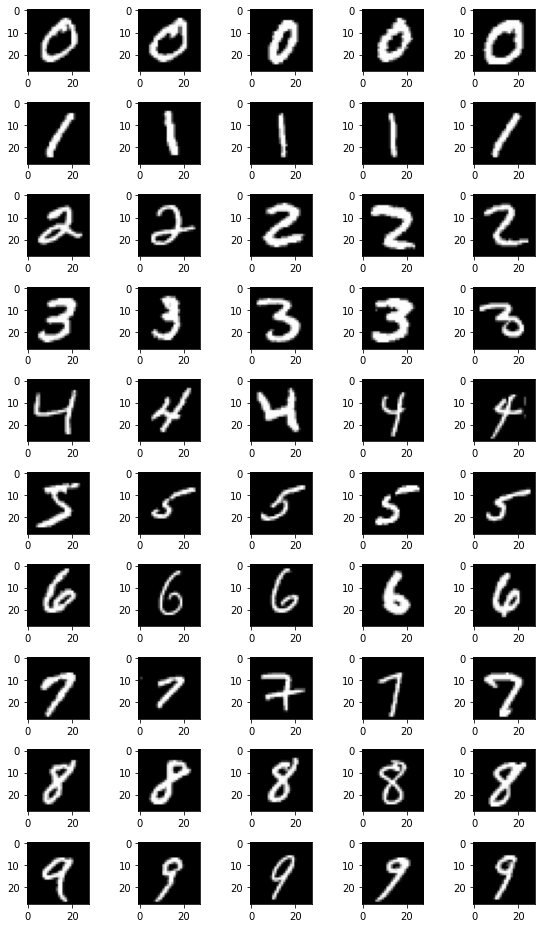

In [4]:
fig, axes = plt.subplots(10,5, figsize=(8,13))
for num in range(10):
    x_plot = X_train[y_train==num]
    for idx in range(np.array(axes).shape[1]):
        axes[num][idx].imshow(x_plot[idx], cmap='gray')
fig.tight_layout()
plt.show()

## Model building
- Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [19]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', name='hidden1'),
  tf.keras.layers.Dense(10, activation='softmax', name='output')
])

## Compile model
- Prepare for fitting

In [6]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Training (Fitting)

In [8]:
tf_fit = model.fit(X_train, y_train, validation_split=0.1, epochs=20, verbose=1)

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2783 - accuracy: 0.9199 - val_loss: 0.1306 - val_accuracy: 0.9635
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1255 - accuracy: 0.9626 - val_loss: 0.0960 - val_accuracy: 0.9720
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0858 - accuracy: 0.9743 - val_loss: 0.0772 - val_accuracy: 0.9778
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0630 - accuracy: 0.9807 - val_loss: 0.0747 - val_accuracy: 0.9777
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0789 - val_accuracy: 0.9778
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0388 - accuracy: 0.9882 - val_loss: 0.0719 - val_accuracy: 0.9790
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0303 - accuracy: 0.9906 - val_loss: 0.0804 - val_accuracy:

In [9]:
for key, val in tf_fit.history.items():
    print( f'{key:20s}: {[ f"{i:3.2f}" for i in val]}')


loss                : ['0.28', '0.13', '0.09', '0.06', '0.05', '0.04', '0.03', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.00', '0.01']
accuracy            : ['0.92', '0.96', '0.97', '0.98', '0.99', '0.99', '0.99', '0.99', '0.99', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00']
val_loss            : ['0.13', '0.10', '0.08', '0.07', '0.08', '0.07', '0.08', '0.08', '0.07', '0.08', '0.08', '0.08', '0.10', '0.09', '0.10', '0.10', '0.09', '0.10', '0.11', '0.10']
val_accuracy        : ['0.96', '0.97', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98', '0.98']


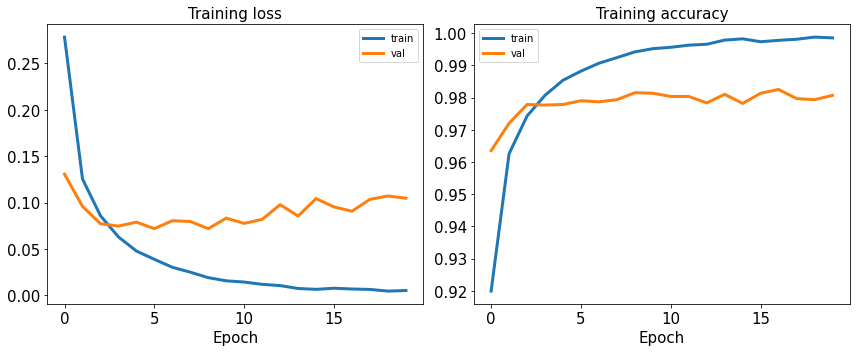

In [10]:
hist = tf_fit.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.plot(hist['val_loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(['train','val'])

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.plot(hist['val_accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax.legend(['train','val'])

#plt.savefig('mnist1.pdf')

plt.show()

## Evaluation
- The `Model.evaluate` method checks the models performance.

In [11]:
model.evaluate(X_test,  y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1158 - accuracy: 0.9778


[0.11580778658390045, 0.9778000116348267]

In [12]:
y_hat = model(X_test)
print(y_hat.shape)
print(y_hat.numpy()[:2])

(10000, 10)
[[5.8376238e-12 8.0903426e-12 1.5713267e-10 8.7183394e-10 4.2568440e-23
  8.5151392e-15 2.7401131e-23 1.0000000e+00 2.5395257e-13 5.0801763e-10]
 [3.9154190e-21 2.2263458e-15 1.0000000e+00 4.8822049e-17 2.6574786e-32
  3.6249197e-19 6.5776741e-17 3.3227058e-29 4.6232682e-10 8.3486111e-26]]


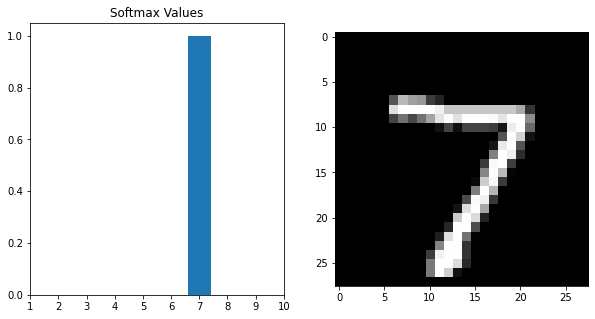

In [13]:
x_ticklabel = [i + 1 for i in range(10)]
fig, axes = plt.subplots(1,2, figsize=(10,5))
yp = y_hat.numpy()[0]
xp = list(range(yp.shape[0]))
axes[0].bar(xp, yp)
axes[0].set_title('Softmax Values')
axes[0].set_xticks(x_ticklabel)
axes[0].set_xticklabels(x_ticklabel)
axes[0].set_xlim([1,10])
axes[1].imshow(X_test[0], cmap='gray')
plt.show()

In [14]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f'Missclassification = {loc.sum()}')

(10000,)
(10000,)
Missclassification = 222


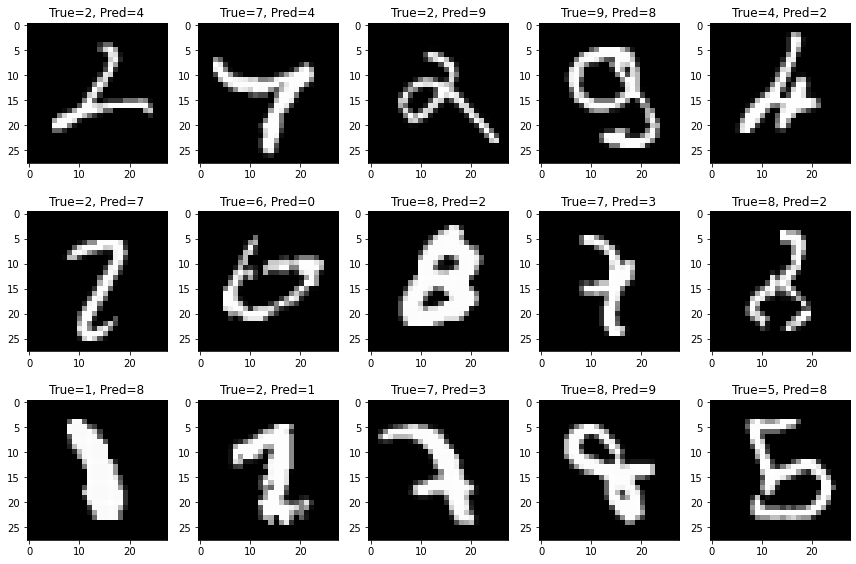

In [15]:
fig, axes2D = plt.subplots(3,5, figsize=(12,8))
axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap='gray')
    ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
fig.tight_layout()
plt.show()